In [1]:
import os, json

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = "data_robustness/"

data = []
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]

for index, js in enumerate(json_files):
        with open(os.path.join(path, js)) as json_file:
            data.append(json.load(json_file))

In [13]:
for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        print(item['num of observables'],min(item['visibilities']))

4 0.8143929636753373
6 0.8042777187771477
3 0.8343138454891896
5 0.7773938094296884


In [42]:
vis_mean = {}

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        vis_mean[str(item['num of observables'])] = sum(item['visibilities'])/len(item["visibilities"])
        print(item['num of observables'],sum(item['visibilities'])/len(item["visibilities"]))

4 0.9677760922296768
6 0.917484785166884
3 0.9899762147883019
5 0.9414326010568612


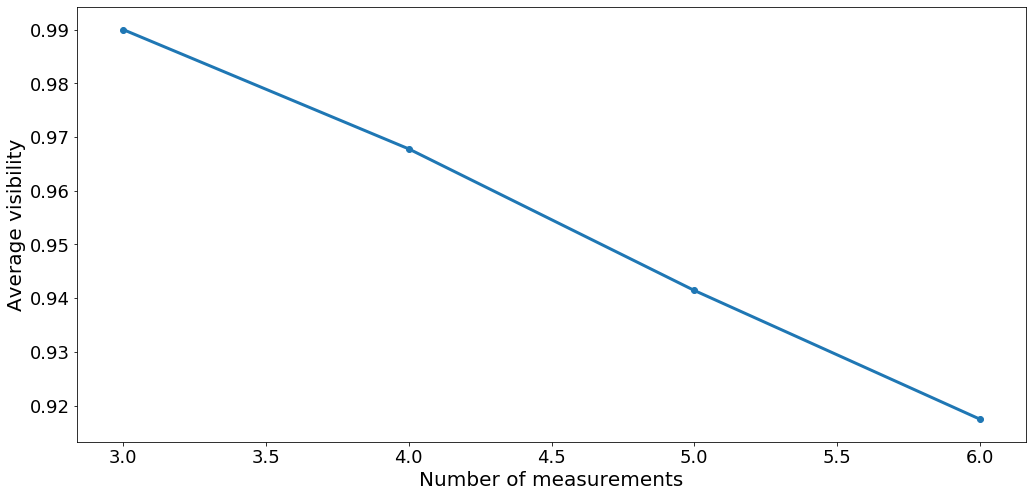

In [43]:
vis_avg = [x for _,x in sorted(zip(list(vis_mean.keys()),list(vis_mean.values())))]

fig = plt.figure(figsize=(17, 8))

plt.plot(range(3,len(vis_avg)+3), vis_avg, linewidth = 3, zorder=1)
plt.scatter(range(3,len(vis_avg)+3), vis_avg, zorder=2)

plt.xlabel('Number of measurements', fontsize=20)
plt.ylabel('Average visibility', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
plt.show()

100000
1000
100000
100000


[Text(0, 0.5, 'Probability Distribution'), Text(0.5, 0, 'Visibility')]

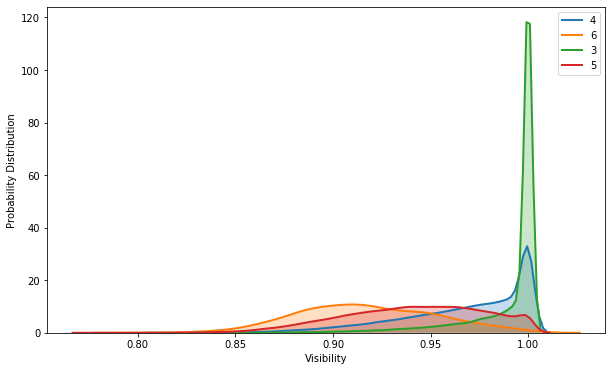

In [7]:
plt.figure(figsize=(10,6))

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        ax = sns.distplot(item['visibilities'], hist = False, kde = True,
                         kde_kws = {'shade': True, 'linewidth': 2},
                          label = item['num of observables'])
        print(len(item["visibilities"]))

ax.set(xlabel='Visibility', ylabel='Probability Distribution')